In [14]:
import pandas as pd
b_cancer = pd.read_csv('b_cancer_processed.csv')

In [15]:
b_cancer.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'mean radius', 'mean texture',
       'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean concave points', 'mean symmetry',
       'mean fractal dimension', 'radius error', 'texture error',
       'perimeter error', 'area error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'worst ', 'Target'],
      dtype='object')

In [16]:
b_cancer.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [17]:
b_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,worst,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.2654,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.1860,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.2430,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.2575,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.1625,0


In [18]:
b_cancer.shape

(569, 32)

In [19]:
b_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [20]:
b_cancer['Target'].unique()

array([0, 1])

In [21]:
X,y = b_cancer.drop(columns='Target'), b_cancer['Target']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X,y,random_state=67, test_size= 0.20)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [25]:
X_train_std.shape

(341, 31)

In [26]:
from sklearn.metrics import confusion_matrix

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_std_pca = pca.fit_transform(X_train_std)
X_test_std_pca = pca.transform(X_test_std)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [29]:
X_train_std_pca.shape

(341, 2)

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [32]:
pipe_svc = make_pipeline(StandardScaler(),
                       PCA(n_components=2),
                       SVC())

In [34]:
pipe_svc.fit(X_train, y_train)
pipe_svc.score(X_test, y_test)

0.9385964912280702

In [36]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(estimator= pipe_svc,
                        X= X_train,
                        y= y_train,
                        cv= 10,
                        n_jobs=-1)

In [37]:
print(f'SVC 10 Folds CV Scores: \n{scores} \nAccuracy: {np.mean(scores)} +/- {np.std(scores)}')

SVC 10 Folds CV Scores: 
[1.         0.91176471 0.97058824 1.         0.94117647 0.91176471
 0.91176471 0.94117647 0.94117647 0.88235294] 
Accuracy: 0.9411764705882353 +/- 0.037203266590216236


In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
pipe_svc = make_pipeline(StandardScaler(),
                        PCA(),
                        SVC(random_state= 42))
param_range = [0.0001, 0.001, 0.01,0.1, 1, 10,100,1000]
param_grid = [{'svc__C': param_range,
              'svc__kernel': ['linear']},
             {'svc__C': param_range,
             'svc__gamma': param_range,
             'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator= pipe_svc,
                 param_grid= param_grid,
                 scoring= 'accuracy',
                 cv = 10,
                 n_jobs= -1)

In [40]:
gs = gs.fit(X_train, y_train)
print(gs.best_score_)

0.9823529411764707


In [41]:
print(gs.best_params_)

{'svc__C': 0.1, 'svc__kernel': 'linear'}


In [42]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('svc', SVC(C=0.1, kernel='linear', random_state=42))])

In [43]:
print(clf.score(X_test, y_test))

0.9824561403508771


In [44]:
print(clf.score(X_validation, y_validation))

0.9736842105263158


In [45]:
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid= param_grid,
                 scoring='accuracy',
                 cv= 2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', 
                        cv = 5)
print(f'CV Accuracy: \n {np.mean(scores)}+/-{np.std(scores)}')

CV Accuracy: 
 0.9852941176470589+/-0.013153341044116414


In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
pipe_svc.fit(X_train, y_train)
y_pred= pipe_svc.predict(X_test)

In [49]:
confusion_mat = confusion_matrix(y_true= y_test, y_pred=y_pred)
print(confusion_mat)

[[43  3]
 [ 0 68]]


In [53]:
import matplotlib.pyplot as plt
def confusion_matrix_2d(confusion_matrix):
    fog, ax = plt.subplots(figsize = (4,4))
    ax.matshow(confusion_matrix, cmap = plt.cm.Blues, alpha= 0.3)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(x=j, y= i, s= confusion_matrix[i,j],va='center', ha= 'center')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Label')
    plt.show()

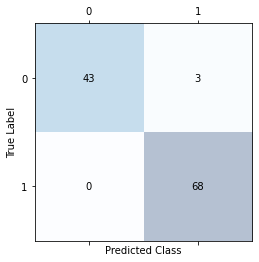

In [54]:
confusion_matrix_2d(confusion_matrix=confusion_mat)

In [55]:
from sklearn.metrics import precision_score, recall_score,f1_score, make_scorer

In [56]:
print(f'Precision Score: {precision_score(y_true= y_test, y_pred= y_pred)}')
print(f'Recall Score: {recall_score(y_true= y_test, y_pred= y_pred)}')
print(f'F1 Score: {f1_score(y_true= y_test, y_pred= y_pred)}')

Precision Score: 0.9577464788732394
Recall Score: 1.0
F1 Score: 0.9784172661870503


In [57]:
scorer = make_scorer(f1_score, pos_label = 0)
gs= GridSearchCV(estimator=pipe_svc,param_grid=param_grid, scoring=scorer,cv=10)

In [58]:
gs = gs.fit(X_train, y_train)

In [59]:
gs.best_score_

0.9753333333333332

In [60]:
gs.best_params_

{'svc__C': 0.1, 'svc__kernel': 'linear'}

In [67]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder

In [68]:
digit = load_digits()

In [69]:
X,y = digit.data, digit.target

In [70]:
X.shape

(1797, 64)

In [71]:
X[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [72]:
y.shape

(1797,)

In [73]:
y[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [75]:
from sklearn.cluster import KMeans

In [76]:
from sklearn.datasets import make_blobs

In [77]:
X,y = make_blobs(n_samples=150, n_features=2,centers=3, shuffle= True, cluster_std=0.5)

In [78]:
X.shape

(150, 2)

In [79]:
X_d = pd.DataFrame(X)

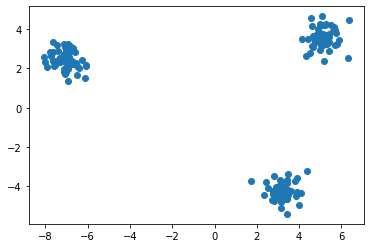

In [81]:
plt.scatter(x = X_d[0],y = X_d[1])

In [82]:
km = KMeans(n_clusters=3, init='random', max_iter=300, tol=1e-04)

In [83]:
y_km = km.fit_predict(X)

In [84]:
y_km

array([1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 2, 2, 0,
       1, 2, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1,
       1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 1,
       1, 1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2,
       2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0,
       1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 2, 2, 1,
       0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0], dtype=int32)

In [85]:
km.cluster_centers_

array([[ 3.21387799, -4.19010886],
       [-7.05474905,  2.42469726],
       [ 5.13276776,  3.58956572]])

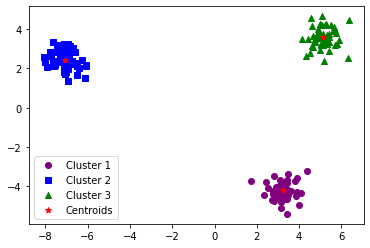

In [86]:
plt.scatter(X[y_km==0,0],
           X[y_km==0,1],
           label= 'Cluster 1', color = 'purple', marker= 'o')
plt.scatter(X[y_km==1,0],
           X[y_km==1,1],
           label= 'Cluster 2', color = 'blue', marker= 's')

plt.scatter(X[y_km==2,0],
           X[y_km==2,1],
           label= 'Cluster 3', color = 'g', marker = '^')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
            marker='*', color = 'r', label= 'Centroids')
plt.legend()
plt.show()